In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Store CSV into DataFrame
ParkDeaths = "StateParkDeaths.csv"
DemiseChart = pd.read_csv(ParkDeaths)
DemiseChart.head()

,Rank,Park Name,Death Total,Park Visits (2007-2018),Deaths per 10 Million Visits,State
0,1,North Cascades National Park,19,"291,255",652.35,WA
1,2,Denali National Park & Preserve,59,"5,870,403",100.50,AK
2,3,Upper Delaware Scenic & Recreational River,21,"3,064,806",68.52,DE
3,4,Big Thicket National Preserve,11,"1,643,769",66.92,TX
4,5,Little River Canyon National Preserve,17,"3,199,845",53.13,AL


In [3]:
#Create new data with select columns
StateDemiseChart = DemiseChart[['State', 'Death Total','Park Name']]
#Clean DataFrame
ByState = StateDemiseChart.sort_values('Death Total', ascending=False).reset_index(drop=True)
ByState.index = ByState.index + 1
ByState = ByState.rename(columns={"State": "state", "Death Total": "deaths", "Park Name": "park_name"})
Graph_Usage = ByState.head()
Graph_Usage

,state,deaths,park_name
1,NV,201,Lake Mead National Recreation Area
2,CA,133,Yosemite National Park
3,AZ,131,Grand Canyon National Park
4,MS,104,Natchez Trace Parkway
5,NC,97,Blue Ridge Parkway


In [4]:
#Connect to local database
#connection_string = "<insert user name>:<insert password>@localhost:5432/customer_db"
#connection_string = "postgres:InTheMourning!83@localhost:5432/State_Demise_db"
#engine = create_engine(f'postgresql://{connection_string}')

In [5]:
# Confirm tables
#engine.table_names()

In [6]:
#Use pandas to load csv converted DataFrame into database
#ByState.to_sql(name='park_deaths_state', con=engine, if_exists='append', index=False)

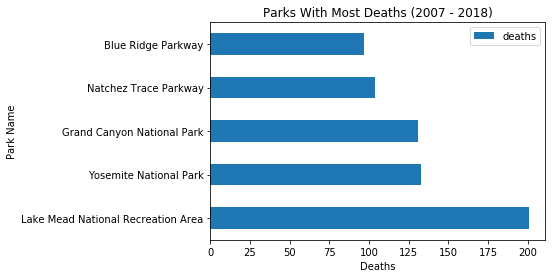

In [7]:
Park_Graph = Graph_Usage.plot.barh(y="deaths", x="park_name")
Park_Graph.set_ylabel("Park Name")
Park_Graph.set_xlabel("Deaths")
Save = Park_Graph.set_title("Parks With Most Deaths (2007 - 2018)")